# Minicurso interno de Python do PET-EE : Dia 1

#### Autor: João Marcos Costa, xx de Setembro de 2017 (última atualização)

## Objetivos

- Dar os primeiros passos com Python
- Funções básicas
- Tipos de dados e estruturas de dados
- NumPy
- Matplotlib

## Exemplo 1: Máquinas Elétricas - Sistemas de excitação múltipla
**Teoria:**

Neste caso, temos um sistema excitado por duas fontes, como mostra a figura abaixo:

<img src='magnetic.png' >

Queremos extrair duas informações desse sistema:
- Coenergia
- Torque no rotor

Para isso, temos as fórmulas da coenergia e torque, respectivamente: 

$$ W'_{fld}(i_{1},i_{2},\theta) = \frac{1}{2}L_{11}i_{1}^{2} + L_{12}i_{1}i_{2}     +\frac{1}{2}L_{22}i_{2}^{2}$$

O Torque (ou Conjugado) é a derivada parcial da coenergia para o ângulo $\theta$:
$$ T_{fld}(\theta) = \frac{i_{1}^2}{2}\frac{dL_{11}(\theta)}{d(\theta)}+ \frac{i_{2}^2}{2}\frac{dL_{22}(\theta)}{d(\theta)} + i_{1}i_{2}\frac{dL_{12}(\theta)}{d(\theta)}$$

Nesse sistema específico, temos os seguintes valores de indutância e corrente:
$$ L_{11} = (3+\cos(2\theta))\cdot 10^{-3}, L_{22} = 0.3\cdot \cos(\theta),L_{12} = (30+10\cos(2\theta))$$
$$ i_{1} = 0.8A, i_{2}=0.3A$$

**Prática:**
- Plotar o gráfico da coenergia
- Plotar o gráfico do torque: linhas do torque total, torque pelas indutâncias mútuas e individuais. Deve conter: legendas, cor de linha, títulos, grid e zoom.
- Fazer um subplot dos dois gráficos acima
- Medir tempos de execução da parte de cálculo

O resultado deve ser semelhante ao mostrado abaixo (fonte: _A. E. Fitzgerald, Charles Kingsley Jr., Stephen Umans Electric machinery_):

<img src='magnetic2.png' >


## Exemplo 2: mapa de cobertura de dois roteadores sem fio


A ideia é calcular a potência recebida em dBm para pontos equidistantes de 5 em 5 metros em uma área de cobertura de 200 por 200 m. A seguintes especificações devem ser obedecidas:

1. Os roteadores devem ser posicionados no meio do grid em relação a abscissa. Em relação ao eixo das ordenadas, o primeiro e segundo roteador deve ficar a 20% e a 80% da dimensão vertical da área de cobertura, respectivamente
2. A potência de transmissão do roteador deve ser $P_T$ = 1 W
3. Considere somente perda de percurso como manifestação de canal. Assim, a potência recebida ($P_R$) pode ser calculada como $P_R = P_T/d^4$, sendo $d$ a distância entre o roteador e o ponto de recepção.

A figura a seguir ilustra o sistema:

<img src='slide30.png' >

Neste caso, vamos implementar esse código de duas maneiras: primeiramente com operações matriciais, e depois com laço FOR, para fazer uma comparação de desempenho. 

/home/pesquisador/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/pesquisador/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


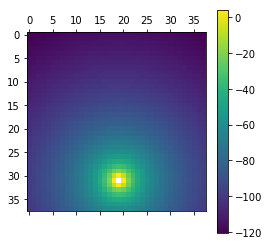

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

d_passo = 5
d_dimensao = 200
nl = (d_dimensao-2*d_passo)/d_passo + 1

x = np.arange(d_passo,d_dimensao-d_passo,d_passo)
y = np.arange(d_passo,d_dimensao-d_passo,d_passo)
X,Y = np.meshgrid(x,y)

roteador_1_coords = X + 1j*Y - (d_dimensao/2 + 0.8*d_dimensao*1j)
roteador_2_coords = X + 1j*Y - (d_dimensao/2 + 0.8*d_dimensao*1j)

roteador_1_pot_dbm = 10*np.log10(1/np.abs(roteador_1_coords)**4/1e-3)
roteador_2_pot_dbm = 10*np.log10(1/np.abs(roteador_2_coords)**4/1e-3)

roteador_1_2_pot_dbm = np.maximum(roteador_1_pot_dbm,roteador_2_pot_dbm)

plt.matshow(roteador_1_pot_dbm+roteador_2_pot_dbm)
plt.colorbar()
plt.show()


In [5]:
np.absolute?